In [20]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as Circle
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['text.usetex'] = True
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import glob

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [21]:
df = pd.read_csv("DVIP_UCI.csv")
df

,dataset_name,vip_layers,bb_alpha,bnn_structure,split,bnn_layer_str,time,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,boston,[1],0.5,"[10, 10]",0,BayesLinear,990.661572,-214.762970,0.063459,-1.364270,0.034625,296700.250000,6.894214,5286.494629,5.019702
1,boston,[1],0.5,"[10, 10]",1,BayesLinear,994.526268,-209.736328,0.060480,-1.383210,0.033009,443294.500000,7.090764,8075.975098,4.128630
2,boston,[1],0.5,"[10, 10]",10,BayesLinear,698.571594,-238.711670,0.045261,-1.648729,0.025551,354367.250000,6.265267,6600.385254,4.686421
3,boston,[1],0.5,"[10, 10]",11,BayesLinear,691.998222,-238.616745,0.042592,-1.654685,0.024548,285148.375000,5.987119,5109.286133,4.605476
4,boston,[1],0.5,"[10, 10]",12,BayesLinear,840.779009,-221.326996,0.050537,-1.494252,0.028800,217883.187500,5.779428,3824.768066,4.604439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,winered,[5],0.0,"[10, 10]",5,SimplerBayesLinear,3348.278834,185.118698,0.595051,0.900589,0.332027,171.943817,0.610515,0.921059,0.339452
2396,winered,[5],0.0,"[10, 10]",6,SimplerBayesLinear,3281.106622,170.481918,0.605288,0.917393,0.336605,158.497864,0.630018,0.948769,0.351943
2397,winered,[5],0.0,"[10, 10]",7,SimplerBayesLinear,3220.813329,165.073410,0.617738,0.937119,0.344468,145.532730,0.591385,0.892289,0.321877
2398,winered,[5],0.0,"[10, 10]",8,SimplerBayesLinear,3367.187644,181.592941,0.597497,0.904437,0.333205,178.277100,0.675782,1.028807,0.376567


Group table by their common parameters and compute mean and std over split

In [22]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "vip_layers", "bb_alpha", "bnn_structure", "bnn_layer_str"]).agg(["mean", std])
full_df


split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
                                 [200, 200]    SimplerBayesLinear   9.5   
                        0.5      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
...                                                                 ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
                                 [200, 200]    SimplerBayesLinear  1.28938   
                        0.5      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
...                                                                    ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [4]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
             [5]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   

                                                                          time  \
                                                                          mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.0      [10, 10]      BayesLinear         1212.909418   
                                               SimplerBayesLinear   706.043601   
                                 [200, 200]    SimplerBayesLinear  9529.205054   
                        0.5      [10, 10]      BayesLinear          803.214961   
                                               SimplerBayesLinear  1420.316915   
...                                                                        ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear  2040.211612   
             [4]        0.0      [10, 10]      BayesLinear         9866.833213   
                                               SimplerBayesLinear  2852.772894   
             [5]        0.0      [10, 10]      BayesLinear         6954.987604   
                                               SimplerBayesLinear  3446.077608   

                                                                                \
                                                                           std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.0      [10, 10]      BayesLinear          131.043739   
                                               SimplerBayesLinear     6.072550   
                                 [200, 200]    SimplerBayesLinear    61.972191   
                        0.5      [10, 10]      BayesLinear           30.360877   
                                               SimplerBayesLinear   338.300045   
...                                                                        ...   
winered      [3]        0.0      [1

# Comparative with other models

In [23]:
vip = full_df.query("bb_alpha == 0.0 and bnn_layer_str == 'SimplerBayesLinear' and bnn_structure == '[10, 10]' and vip_layers == '[1]'")
vip


split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
naval        [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
power        [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
protein      [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
winered      [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
naval        [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
power        [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
protein      [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
winered      [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   

                                                                          time  \
                                                                          mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.0      [10, 10]      SimplerBayesLinear   706.043601   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear   736.584180   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear   825.836156   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear   763.083101   
naval        [1]        0.0      [10, 10]      SimplerBayesLinear   811.339922   
power        [1]        0.0      [10, 10]      SimplerBayesLinear  1088.776170   
protein      [1]        0.0      [10, 10]      SimplerBayesLinear   754.178386   
winered      [1]        0.0      [10, 10]      SimplerBayesLinear   803.776400   

                                                                               \
                                                                          std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                    
boston       [1]        0.0      [10, 10]      SimplerBayesLinear    6.072550   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear   24.168174   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear   60.815680   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear   26.957763   
naval        [1]        0.0      [10, 10]      SimplerBayesLinear   32.586871   
power        [1]        0.0      [10, 10]      SimplerBayesLinear  349.750113   
protein      [1]        0.0      [10, 10]      SimplerBayesLinear   23.966672   
winered      [1]        0.0      [10, 10]      SimplerBayesLinear   32.499421   

                                                                   LOSS_train  \
                                                                         mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                    
boston       [1]        0.0      [10, 10]      SimplerBayesLinear   97.309732   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear  108.839671   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear   48.037678   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear  162.462447   
naval        [1]   

In [24]:
doubly = pd.read_csv("DGP_UCI.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std])
doubly = doubly.query("layers == 1")

In [25]:
doubly

split          iterations       batch            NLL  \
                 mean      std       mean  std   mean  std      mean   
dataset  layers                                                        
boston   1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.626961   
concrete 1        9.5  1.28938   150000.0  0.0  100.0  0.0  3.167927   
energy   1        9.5  1.28938   150000.0  0.0  100.0  0.0  1.548680   
kin8nm   1        9.5  1.28938   150000.0  0.0  100.0  0.0 -0.913354   
naval    1        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.110009   
power    1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.846136   
protein  1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.936848   
wine_red 1        9.5  1.28938   150000.0  0.0  100.0  0.0  0.933053   

                               RMSE                CRPS            \
                      std      mean       std      mean       std   
dataset  layers                                                     
boston   1       0.059719  3.488482  0.177300  1.791255  0.056967   
concrete 1       0.015877  5.843427  0.123310  3.201107  0.057087   
energy   1       0.023252  1.071240  0.036732  0.626005  0.019576   
kin8nm   1       0.004004  0.092649  0.000643  0.052506  0.000312   
naval    1       0.067545  0.000492  0.000037  0.000290  0.000021   
power    1       0.009459  4.156392  0.039344  2.273034  0.011076   
protein  1       0.002535  4.560626  0.012538  2.563942  0.007011   
wine_red 1       0.012462  0.616778  0.008478  0.342316  0.004154   

                        time              
                        mean         std  
dataset  layers                           
boston   1       1589.248456  157.883880  
concrete 1       1012.319973    5.231105  
energy   1       1282.546906  118.178353  
kin8nm   1       1053.983626    8.660710  
naval    1       1309.491201  109.319871  
power    1       1072.947125    1.485943  
protein  1       1690.356893  114.485471  
wine_red 1       1179.076309   60.218949

In [30]:
res1 = [i for i in glob.glob('../results4/*')]
df = []
for f in res1:
    try: 
        df.append(pd.read_csv(f))
    except:
        continue
df = pd.concat(df)
df = df.loc[:, (df != df.iloc[0]).any()] 

In [33]:
taylor = df.drop(["name_flag", "dataset", "epochs", "activation", "final_layer_noise"], axis=1).groupby(["dataset_name", "fix_mean", "fix_variance", "bnn_layer_str"]).agg(["mean", std])
taylor

split            \
                                                            mean       std   
dataset_name fix_mean fix_variance bnn_layer_str                             
boston       False    False        BayesLinear          9.833333  1.410389   
                                   SimplerBayesLinear   9.263158  1.335312   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   
concrete     False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   
energy       False    False        BayesLinear         10.277778  1.309522   
                                   SimplerBayesLinear  10.142857  1.365976   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.105263  1.295410   
kin8nm       False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   
naval        False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear         10.000000  1.256562   
             True     False        BayesLinear          9.500000  1.289380   
power        False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   
protein      False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   
winered      False    False        BayesLinear          9.500000  1.289380   
                                   SimplerBayesLinear   9.500000  1.289380   
                      True         BayesLinear          9.500000  1.289380   
             True     False        BayesLinear          9.500000  1.289380   

                                                               time  \
                                                               mean   
dataset_name fix_mean fix_variance bnn_layer_str                      
boston       False    False        BayesLinear         13136.006467   
                                   SimplerBayesLinear  13332.408478   
                      True         BayesLinear         12981.857222   
             True     False        BayesLinear         11442.987979   
concrete     False    False        BayesLinear         11743.337301   
                                   SimplerBayesLinear  11228.178749   
                      True         BayesLinear         13969.859907   
             True     False        BayesLinear          9107.572155   
energy       False    False        BayesLinear         13576.449907   
                                   SimplerBayesLinear  12586.556841   
                      True         BayesLinear         11991.492235   
             True     False        BayesLinear         10610.255266   
kin8nm       False    False        BayesLinear         10376.889289   
                                   SimplerBayesLinear  12214.292100   
                      True         BayesLinear          9401.312265   
             True     False        BayesLinear    

In [34]:
res1 = [i for i in glob.glob('../results3/*')]
df = []
for f in res1:
    try: 
        df.append(pd.read_csv(f))
    except:
        continue
df = pd.concat(df)
df = df.loc[:, (df != df.iloc[0]).any()] 

In [35]:
moments = df.drop(["name_flag", "dataset", "epochs", "activation", "final_layer_noise"], axis=1).groupby(["dataset_name"]).agg(["mean", std])
moments

split                   time               LOSS_train            \
              mean      std          mean          std        mean       std   
dataset_name                                                                   
boston         9.5  1.28938  13078.349971  1207.523262  185.722765  1.012808   
concrete       9.5  1.28938  10021.787612   121.808193  243.642275  0.822448   
energy         9.5  1.28938  14147.609744   983.531696  164.258082  0.437550   
kin8nm         9.5  1.28938  13023.244182  1793.943915  362.311139  1.107199   
naval          9.5  1.28938  11146.335741   899.230040  628.964127  4.939028   
power          9.5  1.28938   7413.023231   101.494559  258.676214  0.938078   
protein        9.5  1.28938  11588.486913  1079.610170  443.734088  1.229510   
winered        9.5  1.28938  16354.498965  1935.837984  214.918758  0.368769   

             RMSE_train           NLL_train           CRPS_train            \
                   mean       std      mean       std       mean       std   
dataset_name                                                                 
boston         3.553142  0.029133  2.754772  0.007261   1.947019  0.015533   
concrete       7.322988  0.022850  3.441235  0.002451   4.126969  0.011521   
energy         2.348756  0.011583  2.322370  0.003870   1.320646  0.005921   
kin8nm         0.179447  0.000214 -0.295045  0.001092   0.101059  0.000133   
naval          0.001232  0.000019 -5.314447  0.014233   0.000649  0.000009   
power          4.169292  0.004920  2.847541  0.001161   2.288663  0.002222   
protein        4.949861  0.001715  3.017375  0.000353   2.805580  0.001104   
winered        0.634748  0.000977  0.968267  0.001431   0.353950  0.000519   

                    LOSS                RMSE                 NLL            \
                    mean       std      mean       std      mean       std   
dataset_name                                                                 
boston        173.495994  3.445866  4.746895  0.214044  2.959152  0.039858   
concrete      238.817836  1.367828  7.993048  0.173966  3.503859  0.015433   
energy        172.511377  2.230753  2.618604  0.068747  2.409332  0.019025   
kin8nm        358.382294  1.533611  0.184426  0.001142 -0.270484  0.005401   
naval         610.382855  5.356749  0.001226  0.000024 -5.320169  0.016544   
power         268.641333  1.433187  4.204871  0.039604  2.857077  0.008907   
protein       444.714481  1.307101  4.960800  0.012427  3.019529  0.002368   
winered       192.769274  1.303478  0.636778  0.007512  0.971748  0.009633   

                  CRPS            
                  mean       std  
dataset_name                      
boston        2.404609  0.062783  
concrete      4.464251  0.080981  
energy        1.464660  0.033767  
kin8nm        0.103866  0.000625  
naval         0.000645  0.000011  
power         2.304464  0.011347  
protein       2.810457  0.007254  
winered       0.355808  0.003689

In [42]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and make them invisible
    far = means - mean > 3*std
    far[0] = False
    far[1] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True, s = 50)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    
    if far.any() != 0:
        for pos in np.transpose(np.where(far)):
            pos = pos.item()
            x_min, x_max = ax.get_xlim()
            slope = (x_max - x_min)/5
            ax.arrow(x = x_max - slope, y = np.array(model_names)[pos], 
                    dx = slope, dy =0, color = np.array(colors)[pos],
                    width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                    )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    taylor_simpler_query = taylor.query("bnn_layer_str == 'SimplerBayesLinear' and dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    taylor_full_query = taylor.query("bnn_layer_str == 'BayesLinear' and fix_mean == False and fix_variance == False and dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    taylor_mean_query = taylor.query("bnn_layer_str == 'BayesLinear' and fix_mean == False and fix_variance == True and dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    taylor_variance_query = taylor.query("bnn_layer_str == 'BayesLinear' and fix_mean == True and fix_variance == False and dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    moments_query = moments.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()

    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.to_numpy()),
          "SGP": item(doubly_query.to_numpy()),
          "Taylor Simpler": item(taylor_simpler_query.to_numpy()),
          "Taylor Full": item(taylor_full_query.to_numpy()),
          "Taylor Mean": item(taylor_mean_query.to_numpy()),
          "Taylor Variance": item(taylor_variance_query.to_numpy()),
          "Moments Simpler": item(moments_query.to_numpy())

    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize(), fontsize = 20)
        axis.locator_params(axis="x", nbins=4)
        axis.tick_params(axis='y', labelsize=18)
        axis.tick_params(axis='x', labelsize=16)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles, fontsize=20)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles, fontsize=20)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" + "UCI.pdf", bbox_inches='tight')
        

In [43]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "SGP", "Taylor Full", "Taylor Simpler", "Taylor Mean", "Taylor Variance", "Moments Simpler"]
colors = {"VIP": "darkblue",
          "SGP": "darkblue",
          "Taylor Simpler": "darkorange",
          "Taylor Full": "darkorange",
          "Taylor Mean": "darkorange",
          "Taylor Variance": "darkorange",
          "Moments Simpler": "darkorange"}

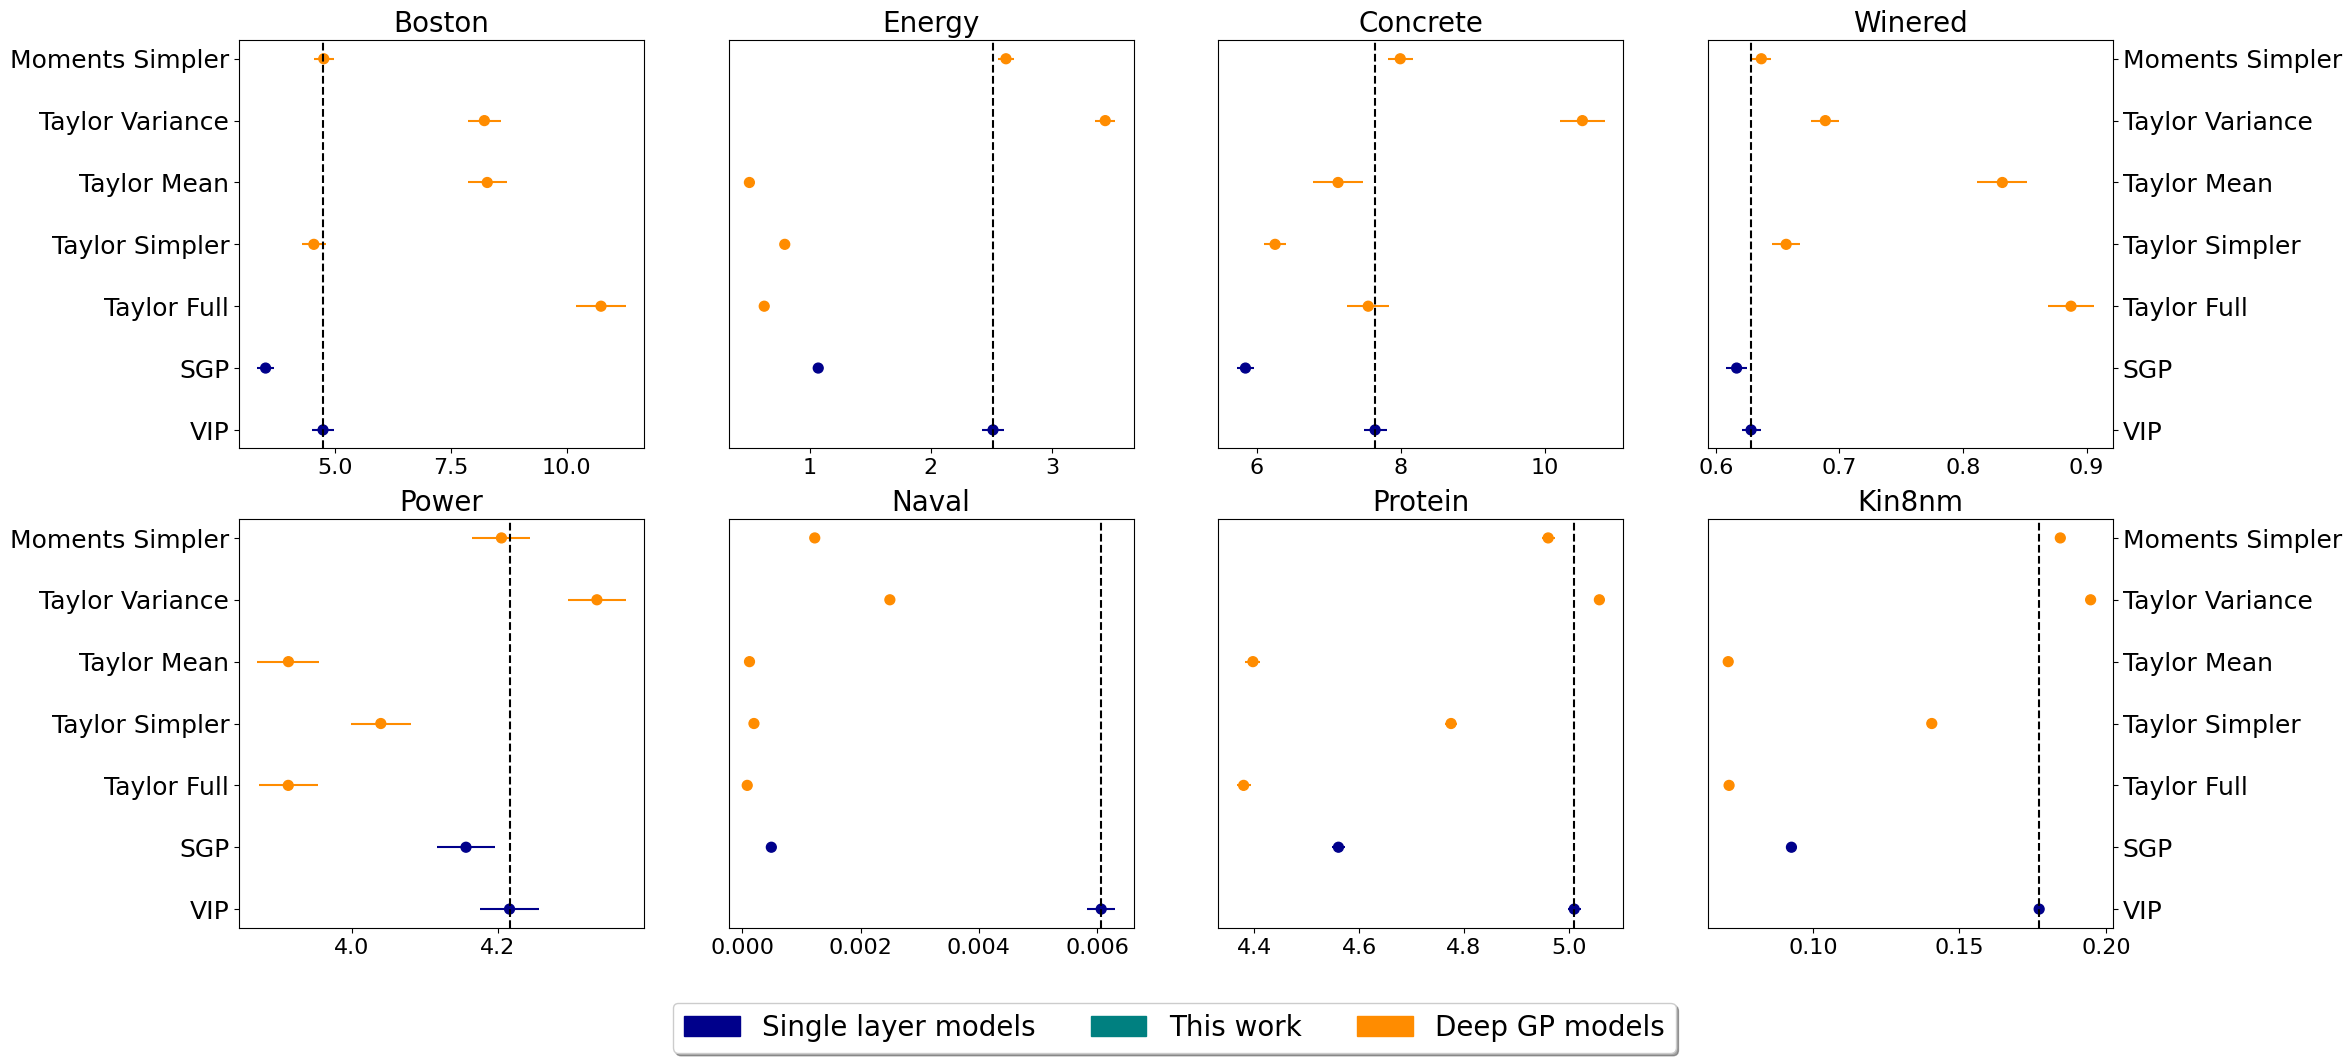

In [44]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

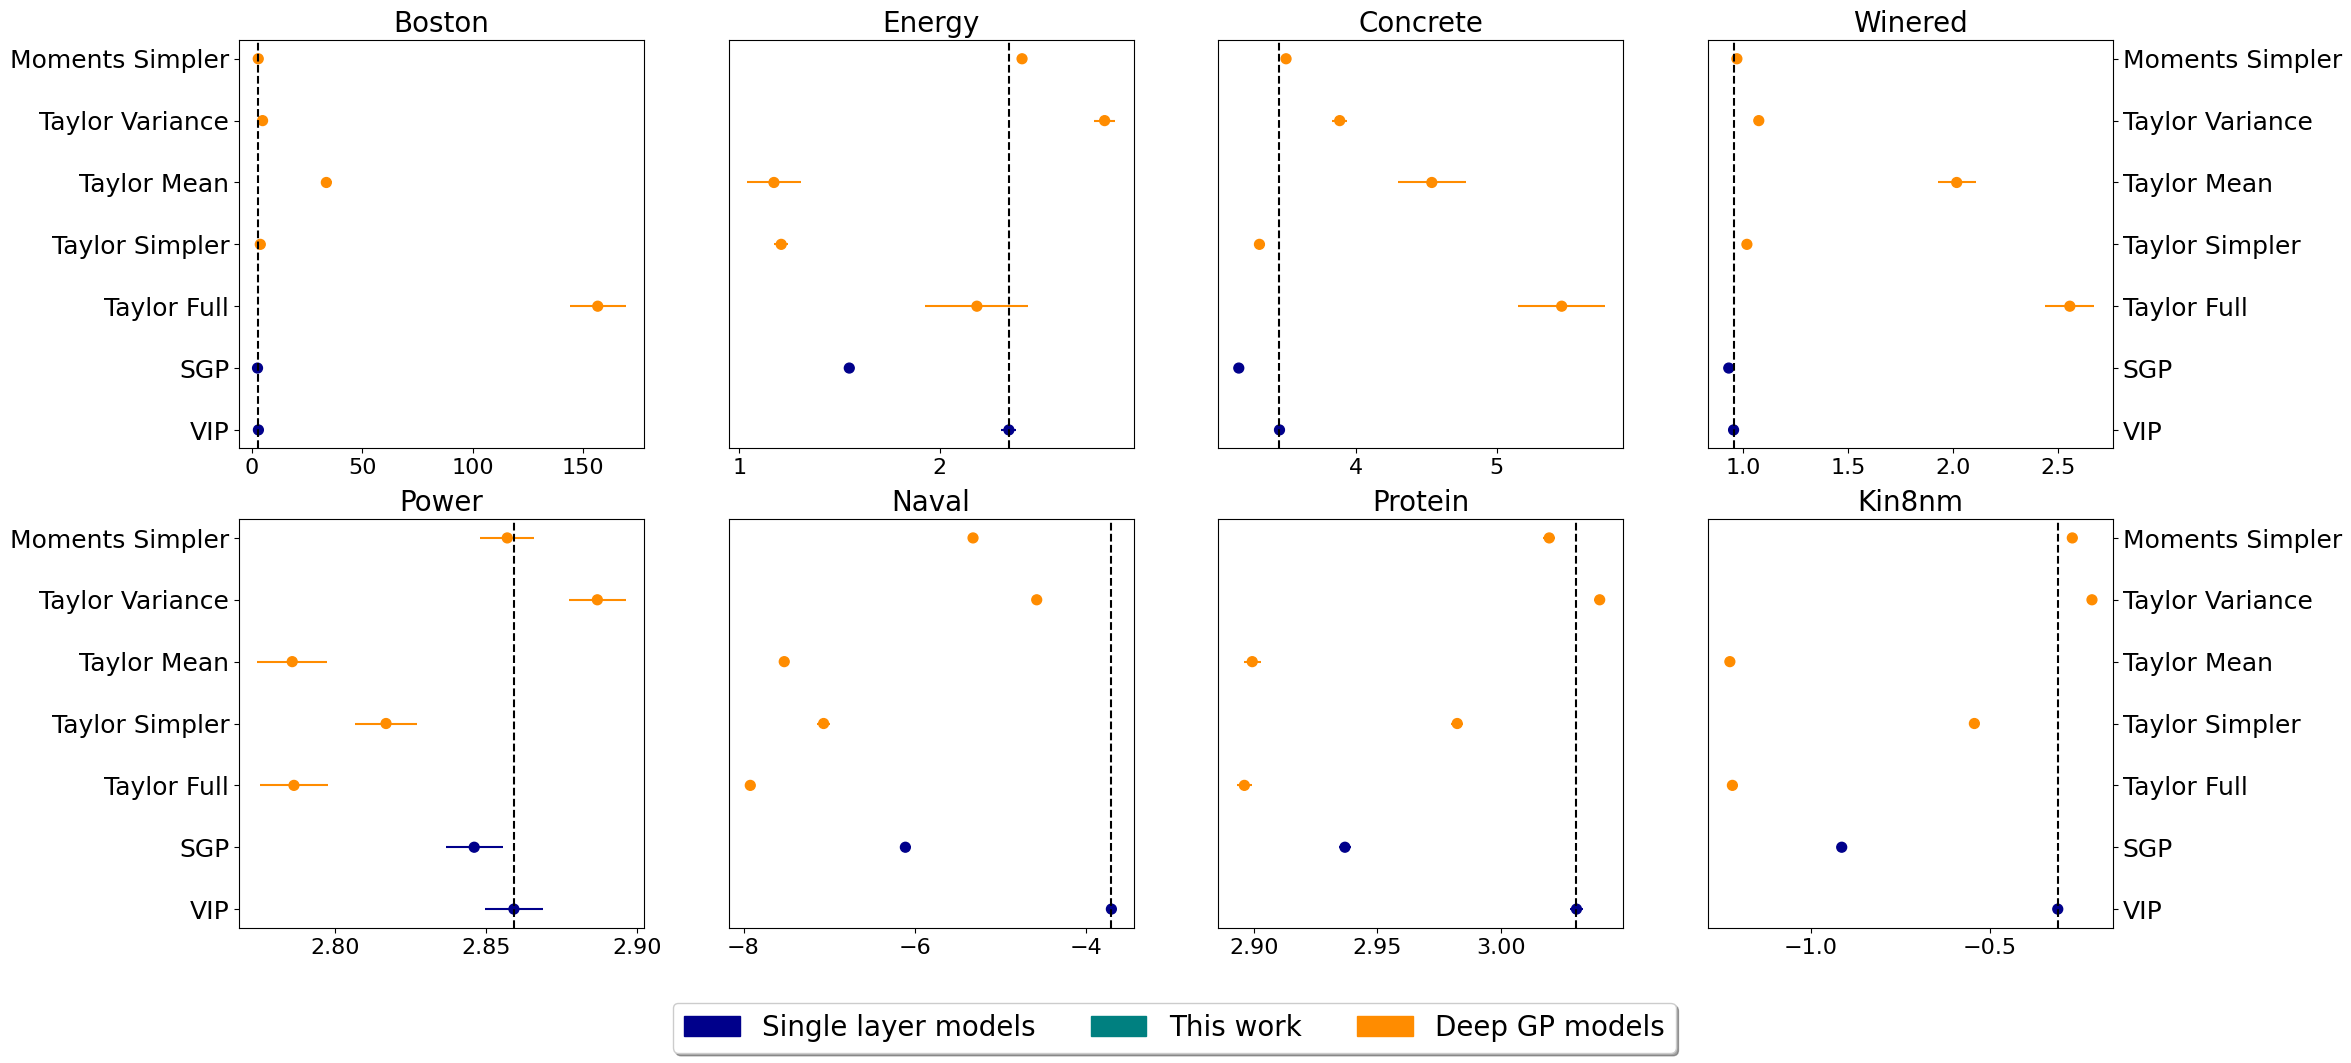

In [45]:
plot_datasets(dataset_names, model_names, colors, "NLL",)

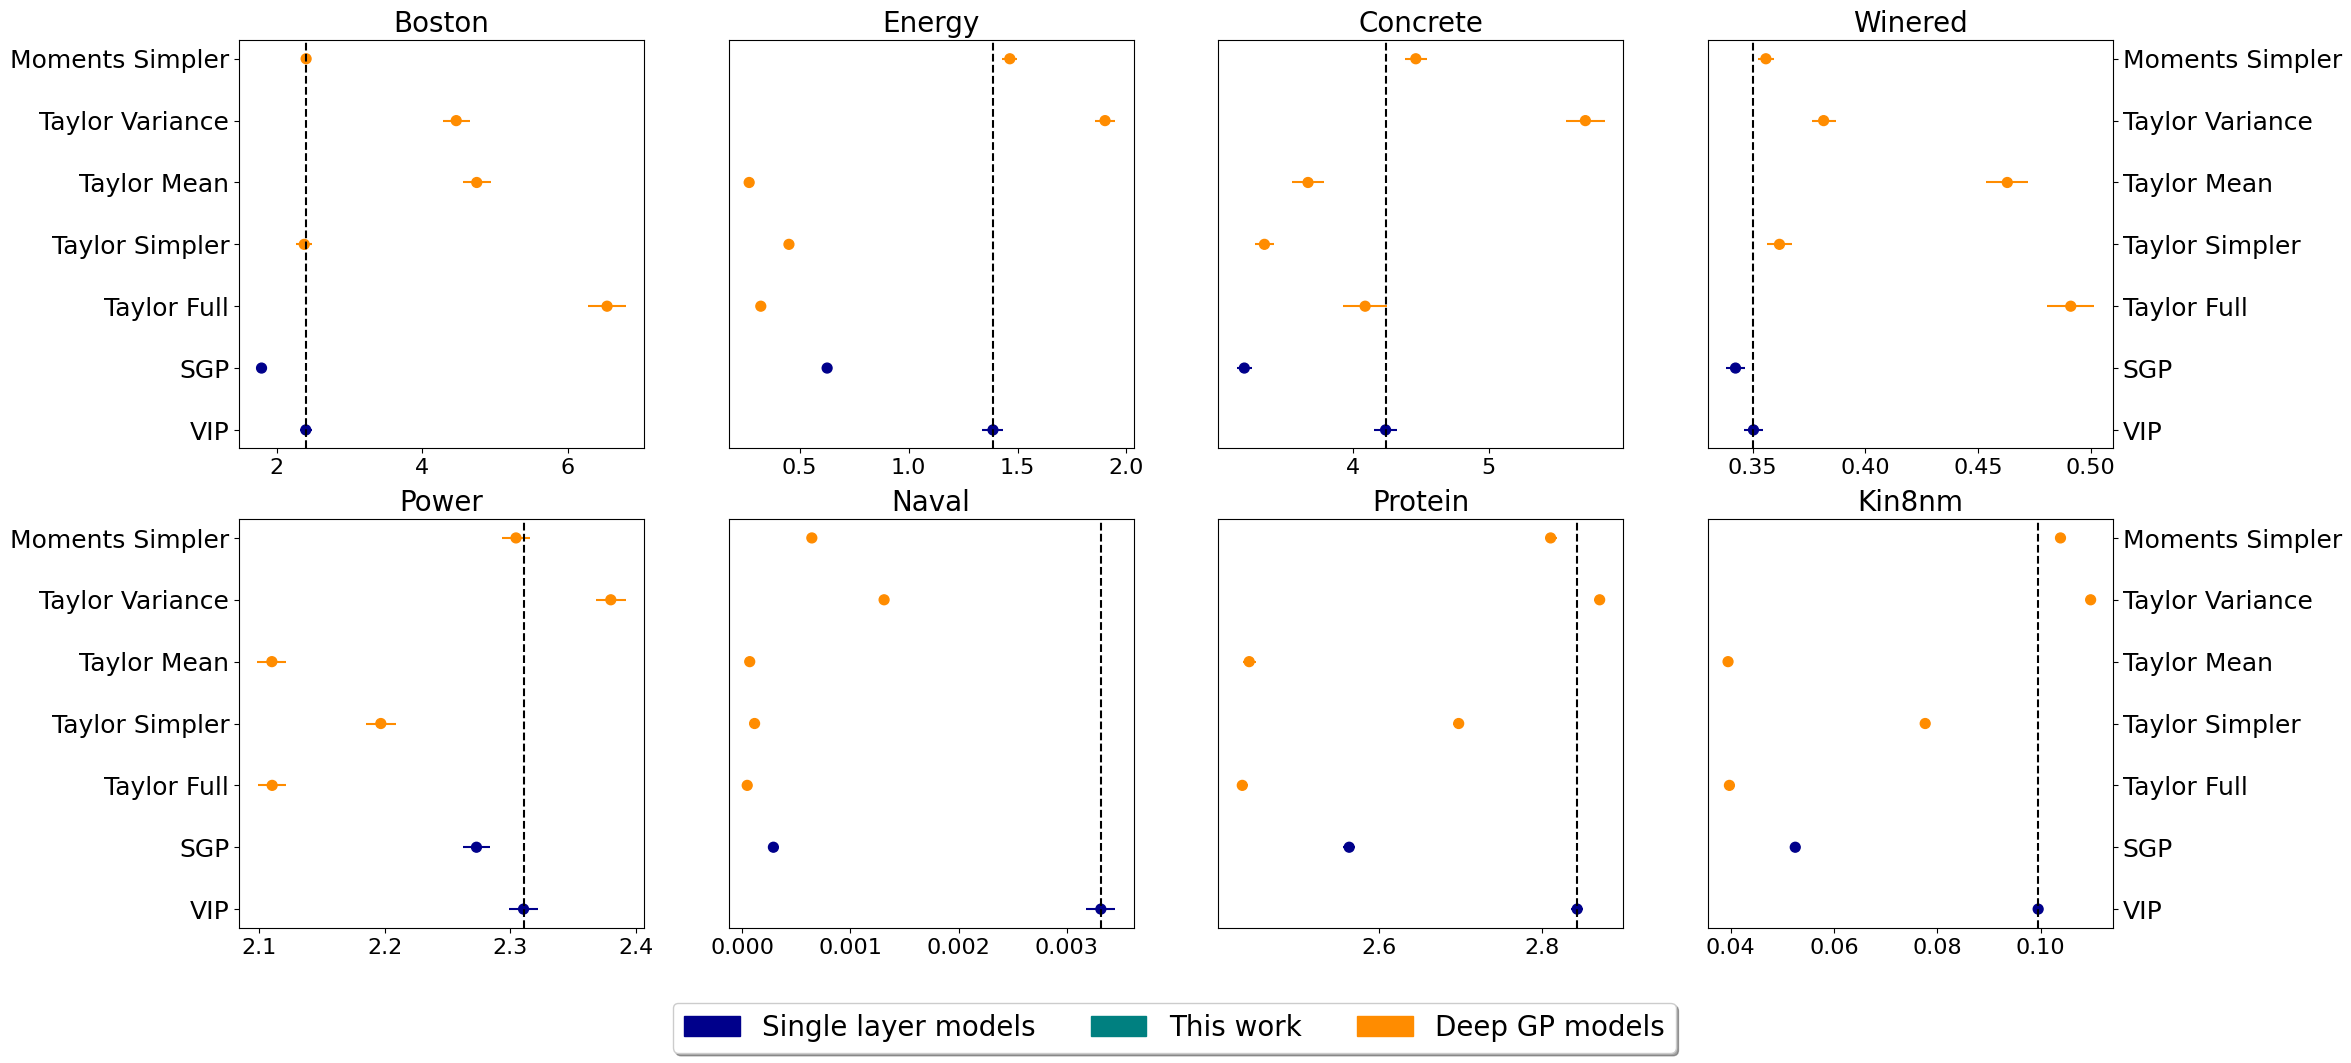

In [47]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

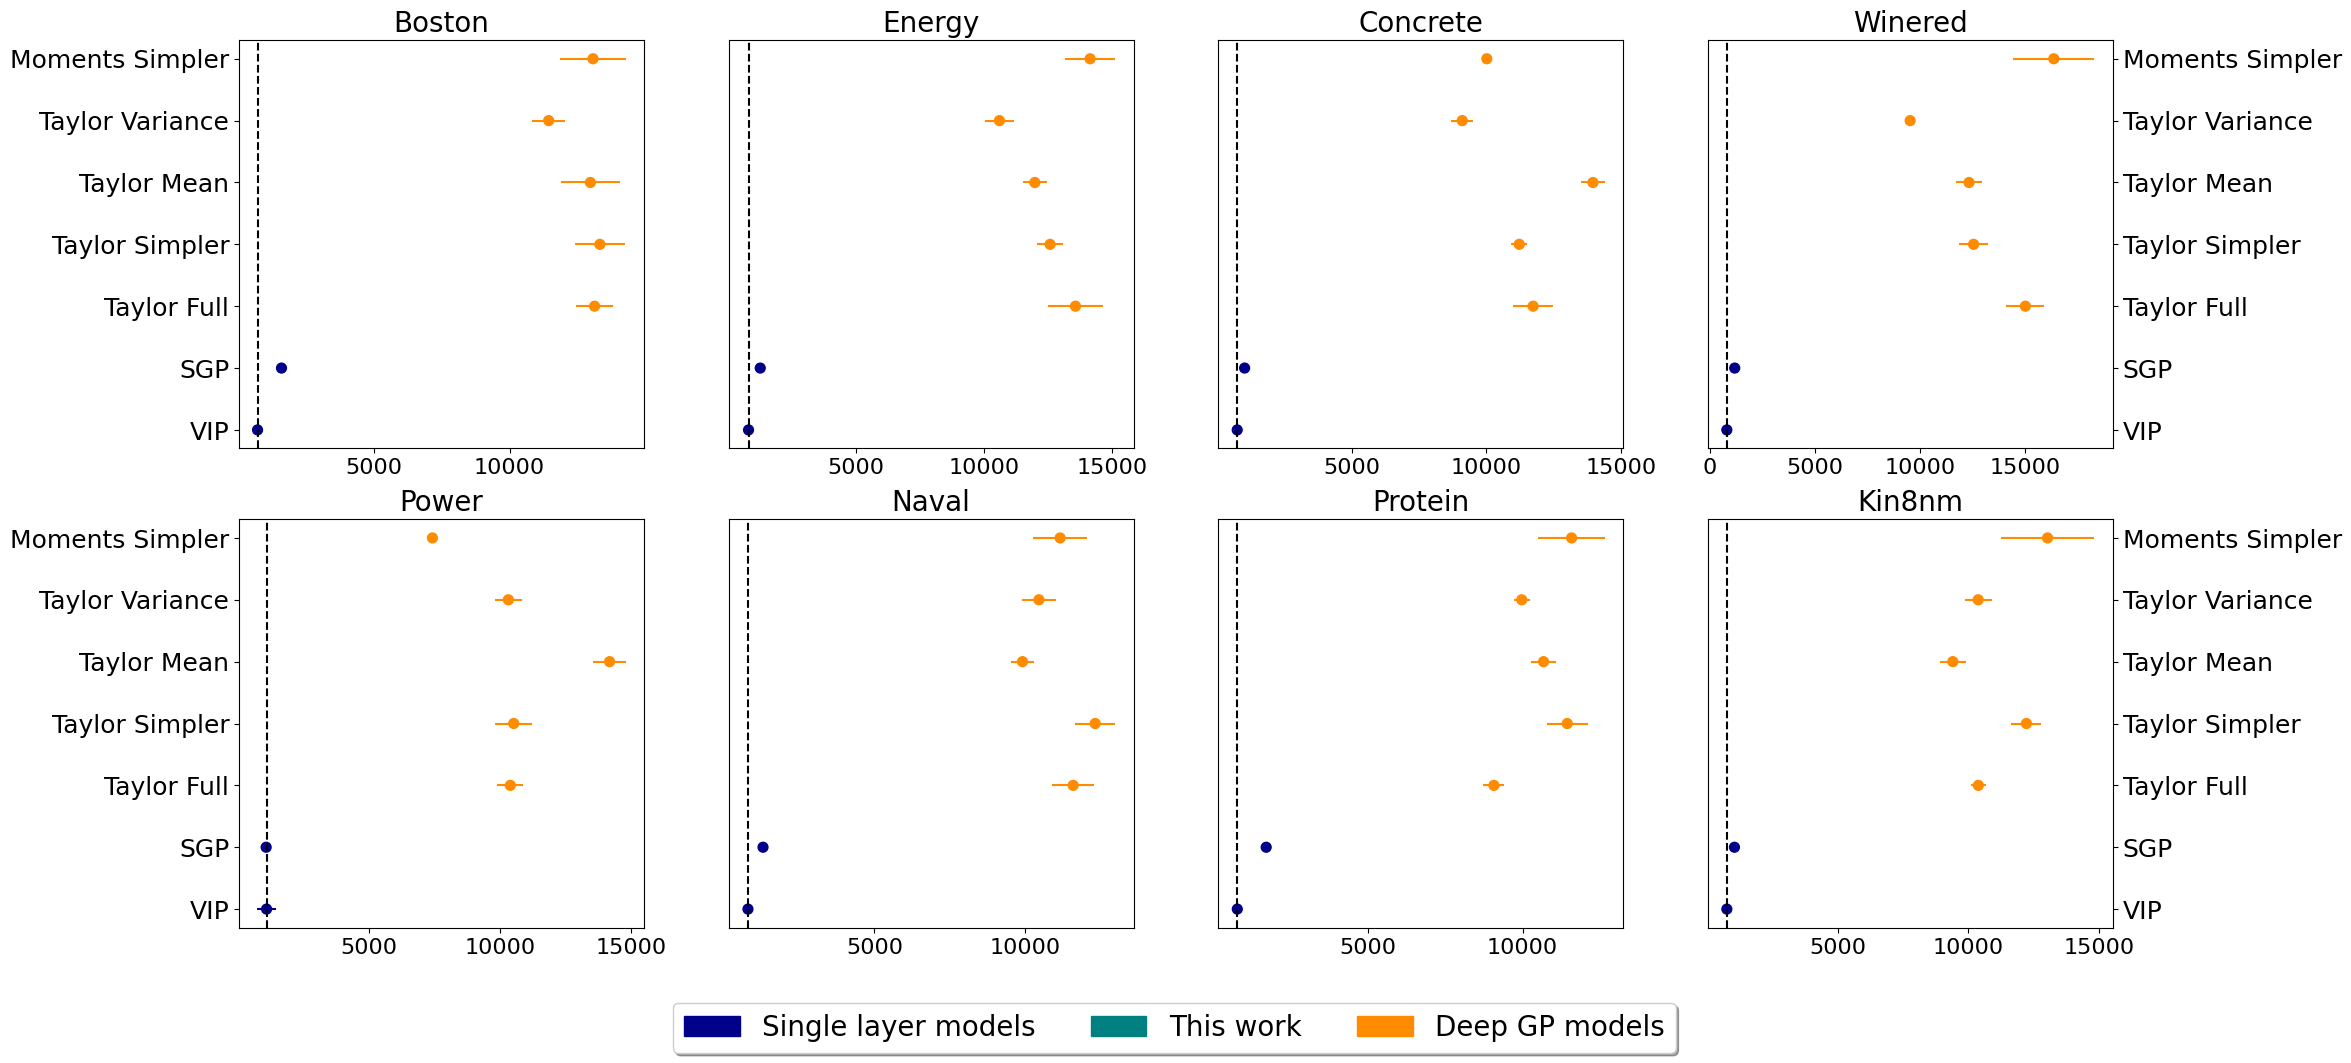

In [48]:
plot_datasets(dataset_names, model_names, colors, "time")